In [19]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score






In [20]:
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Load the dataset from CSV
# Adjust the path to your specific file location in Google Drive
file_path = '/content/drive/MyDrive/marketing_campaign.csv'  # Replace with your path
df = pd.read_csv(file_path, sep='\t')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
# Display the first few rows of the dataset
print(df.head())
print(df.info())


     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

In [22]:
# Part 2: Handling Missing Values
# Impute missing values using mean for numerical columns and mode for categorical columns
imputer_num = SimpleImputer(strategy='mean')
imputer_cat = SimpleImputer(strategy='most_frequent')

# List of numerical and categorical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Impute missing values
df[numerical_cols] = imputer_num.fit_transform(df[numerical_cols])
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])

print("Missing values after imputation:\n", df.isnull().sum())  # Ensure no missing values

Missing values after imputation:
 ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


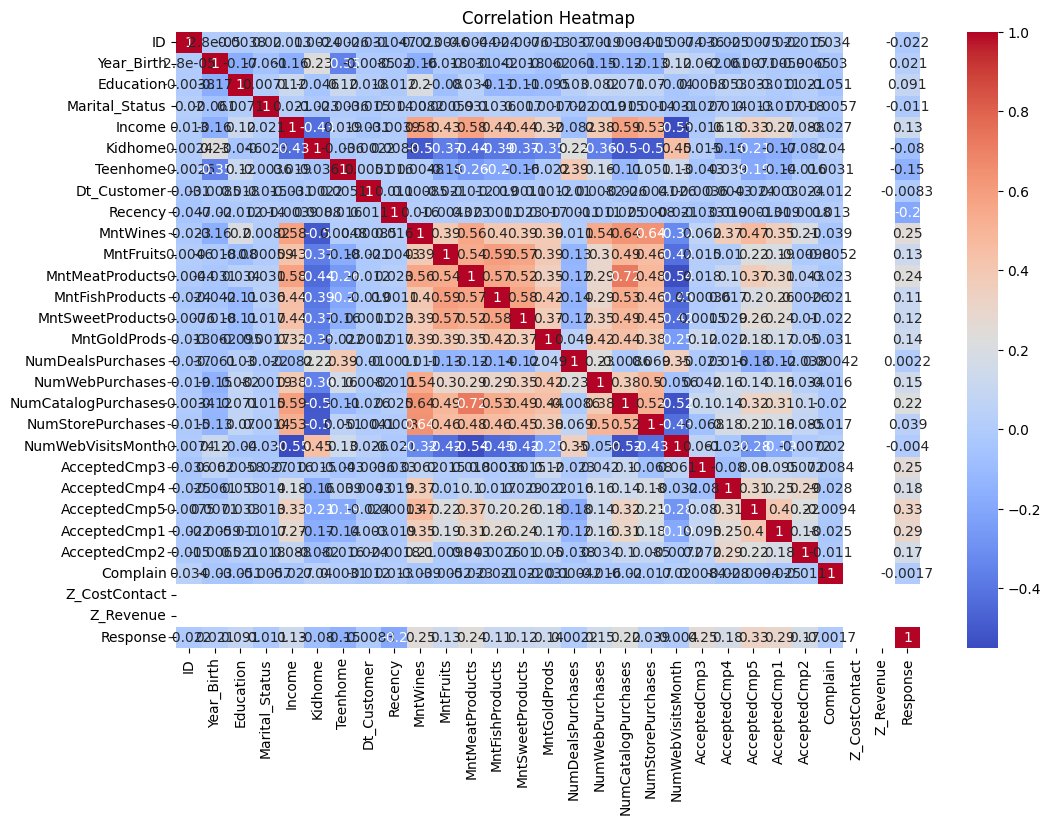

In [23]:
# Convert categorical columns to numerical using Label Encoding
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Part 3: Exploratory Data Analysis (EDA)
# Plot correlation heatmap (after converting categorical data)
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

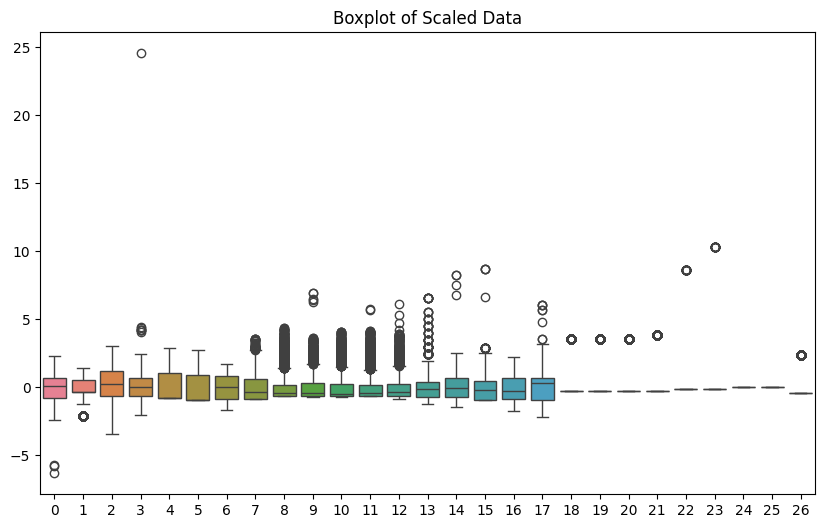

In [24]:
# Part 4: Data Preprocessing
# Drop unnecessary columns like ID and 'Dt_Customer'
df_clean = df.drop(columns=['ID', 'Dt_Customer'], errors='ignore')

# Standardize the numerical features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clean)

# Visualize scaled data distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_scaled)
plt.title('Boxplot of Scaled Data')
plt.show()

In [25]:

# Part 5: Dimensionality Reduction using PCA
# Perform PCA and reduce dimensions to 2
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

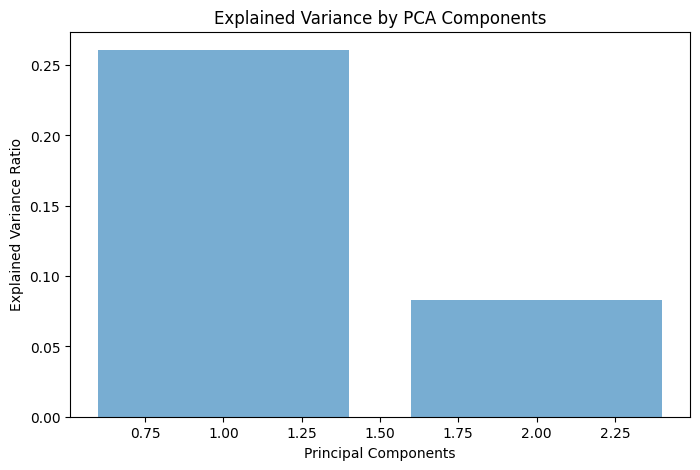

In [26]:
# Plot the explained variance ratio to understand how much variance is explained by the components
plt.figure(figsize=(8, 5))
plt.bar(range(1, 3), pca.explained_variance_ratio_, alpha=0.6)
plt.title('Explained Variance by PCA Components')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.show()

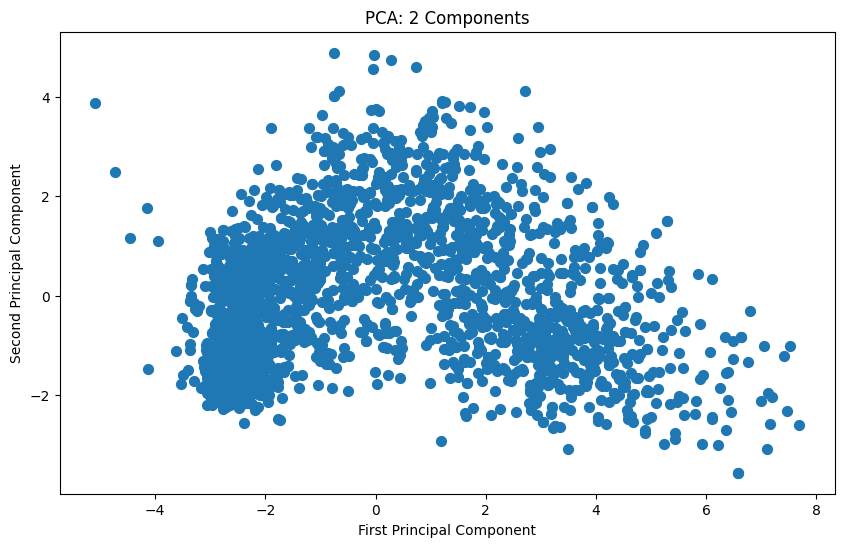

In [27]:

# Plot the PCA components
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], s=50)
plt.title('PCA: 2 Components')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()


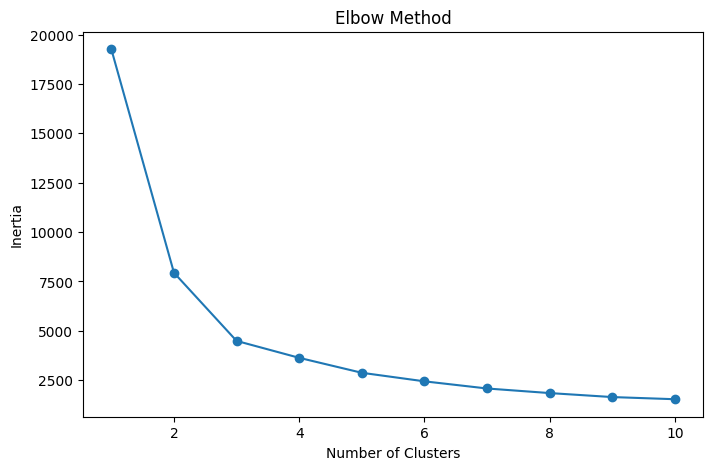

In [28]:
# Part 6: Clustering
# Determine the optimal number of clusters using the Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

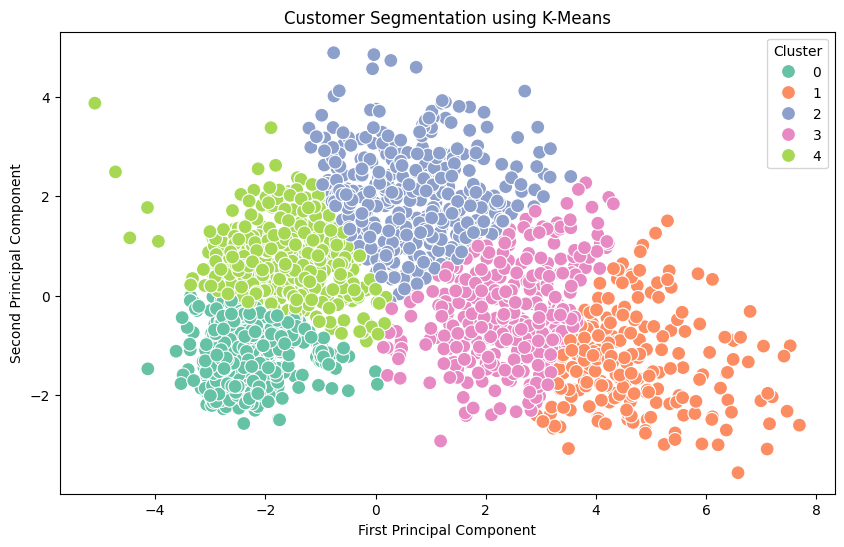

In [29]:

# Perform K-Means clustering with optimal number of clusters
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(df_pca)

# Add the cluster labels to the DataFrame
df_clean['Cluster'] = clusters

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=clusters, palette='Set2', s=100)
plt.title('Customer Segmentation using K-Means')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend(title='Cluster')
plt.show()

In [30]:
# Calculate silhouette score to evaluate clustering quality
silhouette_avg = silhouette_score(df_pca, clusters)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.39193441891329206


Cluster Summary:
           Year_Birth  Education  Marital_Status        Income   Kidhome  \
Cluster                                                                   
0        1976.891547   1.979266        3.681021  30394.847700  0.851675   
1        1969.436214   2.329218        3.884774  83891.458859  0.008230   
2        1962.925170   2.775510        3.725624  59986.476773  0.172336   
3        1968.409429   2.330025        3.699752  70017.488847  0.089330   
4        1964.110266   2.646388        3.743346  43573.317033  0.659696   

         Teenhome    Recency    MntWines  MntFruits  MntMeatProducts  ...  \
Cluster                                                               ...   
0        0.140351  48.312600   21.615630   5.432217        19.668262  ...   
1        0.045267  47.337449  694.876543  82.045267       560.958848  ...   
2        1.013605  49.045351  541.800454  21.310658       144.188209  ...   
3        0.287841  50.965261  513.771712  57.032258       348.506203  .

<ipython-input-31-afe5aeea1ff8>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='Cluster', y='Income', palette='Set3')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group i

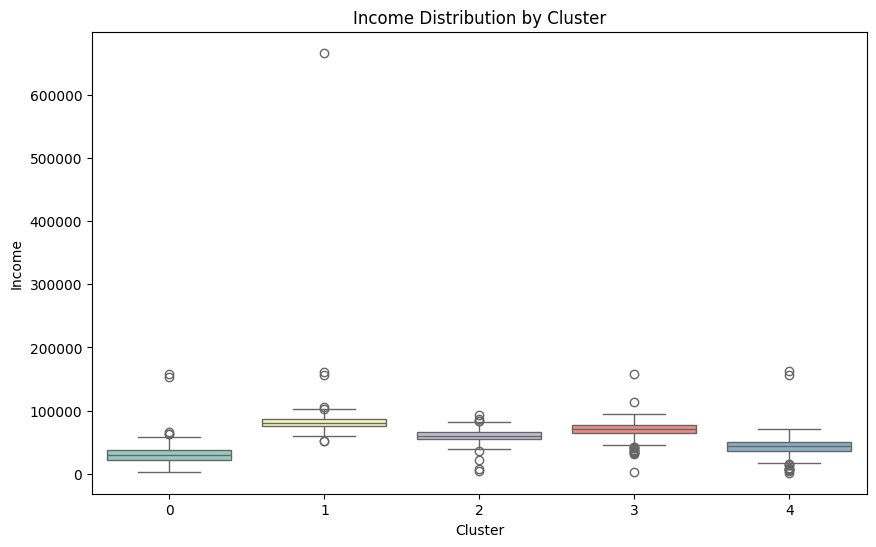

<ipython-input-31-afe5aeea1ff8>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='Cluster', y='MntWines', palette='Set2')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_grou

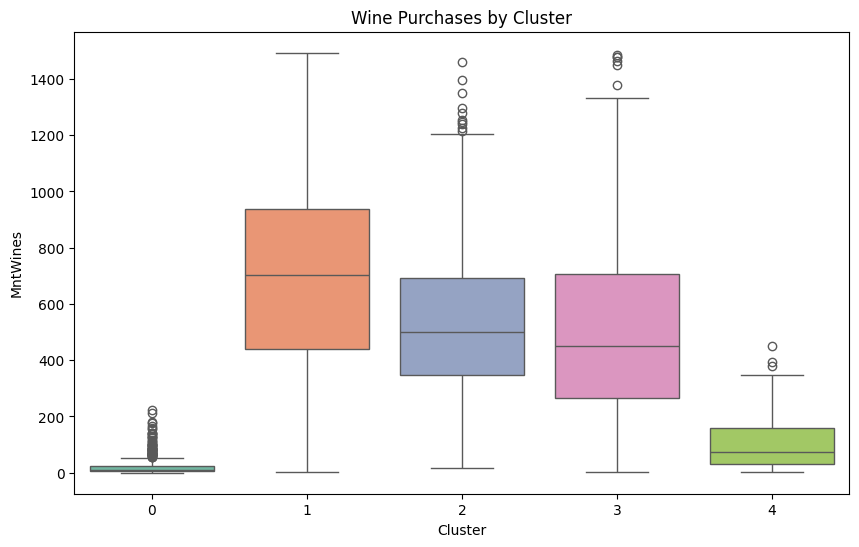

In [31]:
# Part 7: Results and Interpretation
# Group the data by clusters to understand the characteristics of each cluster
cluster_summary = df_clean.groupby('Cluster').mean()

print("Cluster Summary:\n", cluster_summary)

# Visualize the differences in key variables across clusters
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean, x='Cluster', y='Income', palette='Set3')
plt.title('Income Distribution by Cluster')
plt.show()

# Analyze other variables (e.g., number of purchases by cluster)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean, x='Cluster', y='MntWines', palette='Set2')
plt.title('Wine Purchases by Cluster')
plt.show()